# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Handling Date and Time'>2.1. Handling Date and Time</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>
* <a href='#2.3. Merging Dataframes'>2.3. Merging Dataframes</a>
* <a href='#2.4. Handling Numerical Data'>2.4. Handling Numerical Data</a>
* <a href='#2.5. Handling Categorical Data'>2.5. Handling Categorical Data</a>

### <a href='#3. Modeling the Data'>3. Modeling the Data</a>

* <a href='#3.1. Train-Test-Split'>3.1. Train-Test-Split</a>
* <a href='#3.2. Handling Imbalanced Classes'>3.2. Handling Imbalanced Classes</a>
* <a href='#3.3. Training and Evaluating Random Forest Classifier with class_weight'>3.3. Training and Evaluating Random Forest Classifier with class_weight</a>
* <a href='#3.4. Training and Evaluating Random Forest Classifier with SMOTE'>3.4. Training and Evaluating Random Forest Classifier with SMOTE</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [1]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

**Accidents**

In [2]:
accidents = pd.read_csv('dft-road-casualty-statistics-accident-20199.csv',parse_dates=['Date'])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head()

Records: 117536 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,2019-02-18,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,2019-01-15,...,9,9,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,2019-01-01,...,0,0,4,1,1,0,0,1,1,E01000546


In [3]:
#accidents.info()

In [4]:
#accidents.describe().T

In [5]:
#accidents.isna().sum()

The accidents table contains almost 118,000 records and 32 columns, with no missing values. If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties**

In [6]:
casualties = pd.read_csv('dft-road-casualty-statistics-casualty-2019.csv')
print('Records:', casualties.shape[0], '\nColumns:', casualties.shape[1])
casualties.head()

Records: 153158 
Columns: 18


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010128300,2019,10128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,2019,10128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,2019,10128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,2019,10152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2019,10155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [7]:
#casualties.info()

In [8]:
#casualties.describe().T

In [9]:
#casualties.isna().sum()

The casualties table has roughly 153,000 with 18 columns providing detailed information about the casualties. The data is complete, with no missing values. Apart from the index, all data is stored in a numeric format.

**Vehicles**

In [10]:
vehicles = pd.read_csv('dft-road-casualty-statistics-vehicle-20199.csv')
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head()

Records: 216381 
Columns: 27


,Accident_Index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2019010000000.0,2019,10128300,1,9,0,99,9,9,99,...,6,1,58,9,-1,-1,-1,-1,2,1
1,2019010000000.0,2019,10128300,2,9,0,99,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,2,1
2,2019010000000.0,2019,10152270,1,9,0,18,9,9,99,...,6,2,24,5,-1,-1,-1,-1,3,1
3,2019010000000.0,2019,10152270,2,9,0,18,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,6,1
4,2019010000000.0,2019,10155191,1,9,0,3,5,1,0,...,6,1,45,7,-1,-1,-1,-1,4,1


In [11]:
#vehicles.info()

In [12]:
#vehicles.describe().T

In [13]:
#vehicles.isna().sum()

The vehicles table is the largest of all three and contains roughly 216,000 records spanned over 27 columns with detailed information about the vehicle and its driver.

Please use at the [data dictionary](https://data.dft.gov.uk/road-accidents-safety-data/Road-Safety-Open-Dataset-Data-Guide.xlsx) to know what kind of information we have.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Handling Date and Time
<a id='2.1. Handling Date and Time'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [14]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [15]:
# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Police_Force                117536 non-null  int64         
 1   Accident_Severity           117536 non-null  int64         
 2   Number_of_Vehicles          117536 non-null  int64         
 3   Number_of_Casualties        117536 non-null  int64         
 4   Date                        117536 non-null  datetime64[ns]
 5   Day_of_Week                 117536 non-null  int64         
 6   Time                        117536 non-null  object        
 7   Local_Authority_(District)  117536 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 7.2+ MB


Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning Rush from 5am to 10am --> value 1
- Office Hours from 10am to 3pm (or: 10:00 - 15:00) --> value 2
- Afternoon Rush from 3pm to 7pm (or: 15:00 - 19:00) --> value 3
- Evening from 7pm to 11pm (or: 19:00 - 23:00) --> value 4
- Night from 11pm to 5am (or: 23:00 - 05:00) --> value 5

In [16]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [17]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 15:
        return "2"
    elif hour >= 15 and hour < 19:
        return "3"
    elif hour >= 19 and hour < 23:
        return "4"
    else:
        return "5"

In [18]:
# create a little dictionary to later look up the groups I created
daytime_groups = {1: 'Morning: Between 5 and 10', 
                  2: 'Office Hours: Between 10 and 15', 
                  3: 'Afternoon Rush: Between 15 and 19', 
                  4: 'Evening: Between 19 and 23', 
                  5: 'Night: Between 23 and 5'}

In [19]:
# apply this function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head()

,Time,Hour,Daytime
0,17:50,17,3
1,21:45,21,4
2,01:50,1,5
3,01:20,1,5
4,00:40,0,5


In [20]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [21]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents), 3), '%')

Proportion of Missing Values in Accidents Table: 0.001 %


In [22]:
#accidents.isna().sum()

In [23]:
# drop columns we don't need
accidents = accidents.drop(columns=['Location_Easting_OSGR', 'Location_Northing_OSGR', 
                                    'Longitude', 'Latitude', 'LSOA_of_Accident_Location'])

# drop remaining records with NaN's
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [24]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties), 3), '%')

Proportion of Missing Values in Casualties Table: 0.0 %


In [25]:
#casualties.isna().sum()

In [26]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.0 %


In [27]:
#vehicles.isna().sum()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.3. Merging Dataframes
<a id='2.3. Merging Dataframes'></a>

In [28]:
#vehicles.info()

In [29]:
vehicles.columns

Index(['Accident_Index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type'],
      dtype='object')

In [30]:
# combine the accidents with the vehicles table
df = pd.merge(accidents[['Accident_Index', 'Accident_Severity', 'Daytime', 'Speed_limit', 'Urban_or_Rural_Area']], 
              vehicles[['Accident_Index', 'age_of_driver', 'age_of_vehicle', 'sex_of_driver', 
                        'engine_capacity_cc', 'vehicle_manoeuvre']], 
              on='Accident_Index')

df.isna().sum()

Accident_Index         0
Accident_Severity      0
Daytime                0
Speed_limit            0
Urban_or_Rural_Area    0
age_of_driver          0
age_of_vehicle         0
sex_of_driver          0
engine_capacity_cc     0
vehicle_manoeuvre      0
dtype: int64

In [31]:
# drop all NaN's in age column
df = df.dropna()

In [32]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity','Daytime','Speed_limit','Urban_or_Rural_Area','sex_of_driver','vehicle_manoeuvre']:
    df[col] = df[col].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26490 entries, 0 to 26489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Accident_Index       26490 non-null  object  
 1   Accident_Severity    26490 non-null  category
 2   Daytime              26490 non-null  category
 3   Speed_limit          26490 non-null  category
 4   Urban_or_Rural_Area  26490 non-null  category
 5   age_of_driver        26490 non-null  int64   
 6   age_of_vehicle       26490 non-null  int64   
 7   sex_of_driver        26490 non-null  category
 8   engine_capacity_cc   26490 non-null  int64   
 9   vehicle_manoeuvre    26490 non-null  category
dtypes: category(6), int64(3), object(1)
memory usage: 1.2+ MB


*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.4. Handling Numerical Data 
<a id='2.4. Handling Numerical Data'></a>

*Detecting Outliers*

In [33]:
# define numerical columns
num_cols = ['age_of_driver', 'age_of_vehicle', 'engine_capacity_cc']

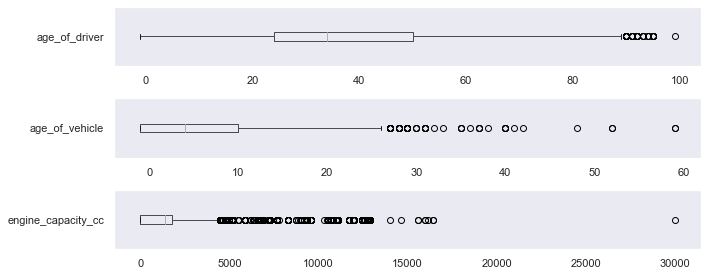

In [34]:
# plotting boxplots
sns.set(style='darkgrid')
fig, axes = plt.subplots(3,1, figsize=(10,4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, grid=False, vert=False, ax=ax)
    plt.tight_layout();

*Handling Outliers*

In [35]:
# phrasing condition
condition = (df['engine_capacity_cc'] < 20000)

# keep only records that meet the condition and don't fall within extreme outliers
df = df[condition]

*Binning Age_of_Vehicle Feature*

In [36]:
df['age_of_vehicle'].describe()

count    26489.000000
mean         5.189060
std          6.024274
min         -1.000000
25%         -1.000000
50%          4.000000
75%         10.000000
max         59.000000
Name: age_of_vehicle, dtype: float64

In [37]:
age_of_vehicle_bins = {1: 'Data Missing', 
                       2: '0 to <2 years', 
                       3: '2 to <5 years', 
                       4: '5 to <10 years', 
                       5: '>=10 years'}

In [38]:
# arguments in bins parameter denote left edge of each bin
df['age_of_vehicle'] = np.digitize(df['age_of_vehicle'], bins=[-1,0,2,5,10])

# convert into categorical column
df['age_of_vehicle'] = df['age_of_vehicle'].astype('category')

# check the count within each bucket
df['age_of_vehicle'].value_counts().sort_index()

1    7885
2    2078
3    4141
4    5438
5    6947
Name: age_of_vehicle, dtype: int64

*Binning Age_of_Driver Feature*

In [39]:
df['age_of_driver'].describe()

count    26489.000000
mean        35.659557
std         20.374617
min         -1.000000
25%         24.000000
50%         34.000000
75%         50.000000
max         99.000000
Name: age_of_driver, dtype: float64

In [40]:
age_of_driver_bins = {1: 'Data Missing', 
                      2: 'up to 23 years', 
                      3: '24 to 35 years', 
                      4: '36 to 50 years', 
                      5: '>50 years'}

In [41]:
# arguments in bins parameter denote left edge of each bin
df['age_of_driver'] = np.digitize(df['age_of_driver'], bins=[-1,0,24,36,51])

# convert into categorical column
df['age_of_driver'] = df['age_of_driver'].astype('category')

# check the count within each bucket
df['age_of_driver'].value_counts().sort_index()

1    3102
2    3421
3    7319
4    6250
5    6397
Name: age_of_driver, dtype: int64

In [42]:
# re-define numerical feature columns - only one left
num_cols = ['engine_capacity_cc']

*Feature Scaling*

If you use a distance based algorithm and your numerical features’ range vary widely, the algorithm won’t work properly unless the range of all features is normalized.

Tree based models, which we will use here, are not distance based and can handle varying ranges of features. Therefore scaling is not required.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.5. Handling Categorical Data
<a id='2.5. Handling Categorical Data'></a>

In [43]:
# define categorical feature columns
cat_cols = ['Daytime', 'Speed_limit', 'Urban_or_Rural_Area',
            'age_of_driver', 'age_of_vehicle', 'sex_of_driver', 'vehicle_manoeuvre']

# define target col
target_col = ['Accident_Severity']

cols = cat_cols + num_cols + target_col

# copy dataframe - just to be safe
df_model = df[cols].copy()
df_model.shape

(26489, 9)

*Encoding categorical features*

In [44]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model[num_cols], df_model[target_col], dummies], axis=1)
df_model.shape

(26489, 41)

In [45]:
df_model.isna().sum().sum()

0

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Modeling the Data
<a id='3. Modeling the Data'></a>

#### 3.1. Train-Test-Split
<a id='3.1. Train-Test-Split'></a>

In [46]:
# define our features 
features = df_model.drop(['Accident_Severity'], axis=1)

# define our target
target = df_model[['Accident_Severity']]

In [47]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

#### 3.2. Handling Imbalanced Classes
<a id='3.2. Handling Imbalanced Classes'></a>

If we have a target vector with highly imbalanced classes ...

In [48]:
df_model['Accident_Severity'].value_counts(normalize=True)

3    0.798709
2    0.183737
1    0.017554
Name: Accident_Severity, dtype: float64

... and we can't apply the best strategy and simply collect more data, especially from the minority class, we need to find other ways to deal with imbalanced classes.

- A second strategy is to use a model evaluation metric better suited to imbalances classes: confusion matrices, precision, recall, F1 scores, or ROC curves instead of accuracy.
- A third strategy is to use the class weighing parameter included in implementations of some models. This allows us to have the algorithm adjust for imbalanced classes.
- The fourth and fifth strategies are related: downsampling and upsampling.

Let's try first on **class_weight parameters**: The Random Forest Classifier I am using now is a popular classification algorithm and includes a `class_weight` parameter.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.3. Training and Evaluating Random Forest Classifier with class_weight
<a id='3.3. Training and Evaluating Random Forest Classifier with class_weight'></a>

In [49]:
# import classifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import classification_report, confusion_matrix

# import evaluation tools
from sklearn.model_selection import KFold, cross_val_score

In [50]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1, class_weight='balanced')

# train
forest_1.fit(X_train, y_train)

# predict
y_test_preds  = forest_1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and class_weight Parameter: \n', report)

Classification Report Random Forest - with Entropy and class_weight Parameter: 
               precision    recall  f1-score   support

           1       0.10      0.17      0.13       104
           2       0.23      0.21      0.22       962
           3       0.82      0.82      0.82      4232

    accuracy                           0.70      5298
   macro avg       0.38      0.40      0.39      5298
weighted avg       0.70      0.70      0.70      5298



In [51]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_1, X_train, y_train, scoring='f1_macro')

array([0.37771404, 0.38430286, 0.36519196, 0.36867372, 0.37529135])

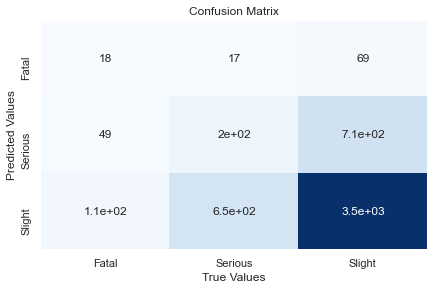

In [52]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 3.4. Training and Evaluating Random Forest Classifier with SMOTE
<a id='3.4. Training and Evaluating Random Forest Classifier with SMOTE'></a>

The Random Forest using the `weight_class` parameter did not perform very well on classifying the severity. So let's try one of the resampling strategies to deal properly with our imbalances target classes: **Synthetic Minority Over-sampling Technique (SMOTE)**. Here we're repeatedly sample with replacement from the minority class to make it of equal size as the majority class. To be more specific: We're creating new synthetic data for the minority class - that is representative but not exact duplicate.

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(target['Accident_Severity'].value_counts())

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train) 

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(y_resampled.value_counts())

Before Upsampling with SMOTE:
3    21157
2     4867
1      465
Name: Accident_Severity, dtype: int64

After Upsampling with SMOTE:
Accident_Severity
1                    16925
2                    16925
3                    16925
dtype: int64


(None, None)

In [55]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [56]:
# instantiate second RandomForestClassifier with entropy and SMOTE
forest_2 = RandomForestClassifier(random_state=4, criterion='entropy', n_jobs=-1)

# train
forest_2.fit(X_train, y_train)

# predict
y_test_preds = forest_2.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest - with Entropy and SMOTE Upsampling: \n', report)

Classification Report Random Forest - with Entropy and SMOTE Upsampling: 
               precision    recall  f1-score   support

           1       0.90      0.96      0.93      4234
           2       0.73      0.75      0.74      4214
           3       0.79      0.72      0.75      4246

    accuracy                           0.81     12694
   macro avg       0.81      0.81      0.81     12694
weighted avg       0.81      0.81      0.81     12694



In [57]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
cross_val_score(forest_2, X_train, y_train, scoring='f1_macro')

array([0.79500309, 0.80549339, 0.79968624, 0.79991984, 0.79975895])

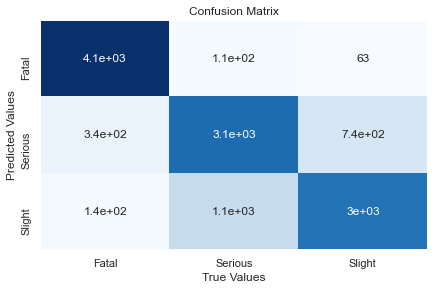

In [58]:
# create confusion matrix
matrix = confusion_matrix(y_test, y_test_preds)

# create dataframe
class_names = df_model.Accident_Severity.values
dataframe = pd.DataFrame(matrix, index=['Fatal', 'Serious', 'Slight'], 
                         columns=['Fatal', 'Serious', 'Slight'])

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout(), plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

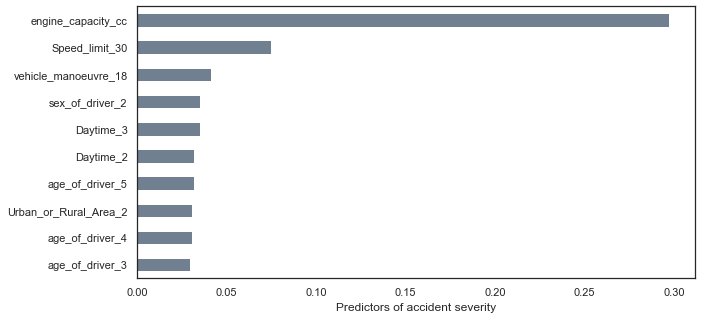

In [59]:
# plot the important features
sns.set_style('white')
feat_importances = pd.Series(forest_2.feature_importances_, index=features.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', figsize=(10,5),color='slategray')
plt.xlabel('Predictors of accident severity');